In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
## Functions - MAKE SURE TO RUN FIRST
def write_parameters_to_file(filename, parameters):
    """
    Writes parameters to a file in the form of key=value pairs.
    
    Args:
    filename (str): The name of the file to write to.
    parameters (dict): A dictionary containing the parameters to write.
    """
    with open(filename, 'w') as file:
        for key, value in parameters.items():
            file.write(f"{key}={value}\n")
            

def write_to_csv(filename, array_2d):
    """
    Writes a 2D or 1D NumPy array to a CSV file with fixed width for each number.
    Numbers are formatted to have a width of 5 characters.
    
    Args:
    filename (str): The name of the CSV file to write to.
    array_2d (numpy.ndarray): The 2D or 1D NumPy array to write to the CSV file.
    """
    with open(filename, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        if array_2d.ndim == 1:
            # The array is 1D, format and write it as a single row
            formatted_row = ['{:5}'.format(item) for item in array_2d]
            csvwriter.writerow(formatted_row)
        else:
            # The array is 2D, format and write it row by row
            for row in array_2d:
                formatted_row = ['{:5}'.format(item) for item in row]
                csvwriter.writerow(formatted_row) 

# Initial Condition Generator
This notebook initializes fields relevant to the solving of the incompressible Navier Stokes Equations for use in the accompanying main.cpp (and simulateNS executable) scripts. To ensure consistency, each initializer generates 6 files named:
 - `u.csv`
 - `v.csv`
 - `p.csv`
 - `gx.csv`
 - `gy.csv`
 - `scalars.dat`
In a directory named based off the shape of initial conditions the code is trying to emulate. For example, the vortex initial conditions would be stored in `vortex/field.csv`

### Structure of scalars file
The scalars in `scalars.dat` should be written in the form:
```
Nx=10
Ny=100
```
etc.

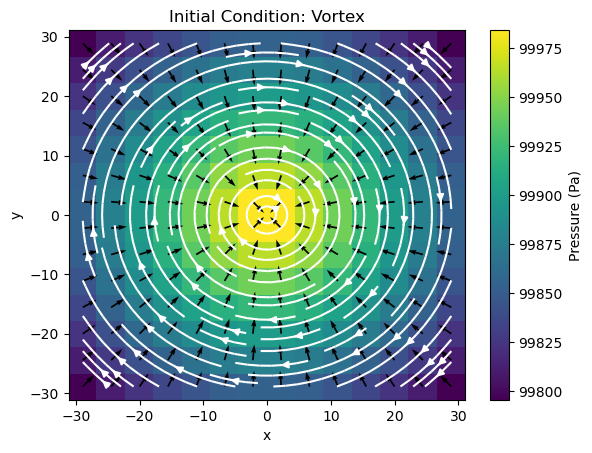

In [16]:
# Vortex Initial Conditions
directory_name = "vortex/"

# Scalars relevant to specific simulation
parameters = {
    'Nx': 10, 
    'Ny': 10, 
    'NG': 2, 
    'rho': 1000, 
    'mu': 1.0e-6, 
    'xmin': -20.0, 
    'xmax': 20.0, 
    'ymin': -20.0, 
    'ymax': 20.0,
    'tmax': 0.1,
    'dt': 0.0001,
}

# Defining the x and y directions to populate the 5 fields
parameters['dx'] = (parameters['xmax'] - parameters['xmin']) / (parameters['Nx'] - 1)
parameters['dy'] = (parameters['ymax'] - parameters['ymin']) / (parameters['Ny'] - 1)

dx = parameters['dx']
dy = parameters['dy']

# Need to go extra distance to grab the ghost zones on the end
x = np.linspace(parameters['xmin'] - parameters['NG']*dx, parameters['xmax'] + parameters['NG']*dx, parameters['Nx'] + 2*parameters['NG'])
y = np.linspace(parameters['ymin'] - parameters['NG']*dy, parameters['ymax'] + parameters['NG']*dy, parameters['Ny'] + 2*parameters['NG'])

# Allocating u, v, gx, gy, p
u = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
v = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gx= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gy= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
p = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))

for (i, xi) in enumerate(x):
    for (j, yj) in enumerate(y):
        # Geometric coefficients useful for calculating the vortex
        theta = np.arctan2(xi, yj)
        r = np.sqrt(xi**2 + yj**2)
        
        gx[i,j] = -np.cos(theta)/10
        gy[i,j] = -np.sin(theta)/10
        
        # gy[i,j] = 0.0005*r*np.cos(theta)  # force points against flow
        # gx[i,j] = -0.0005*r*np.sin(theta) - xi/1000                # pushing towards center because its cool
        
        u[i,j] = np.sqrt(r)*np.sin(theta)/10
        v[i,j] = -np.sqrt(r)*np.cos(theta)/10
        
        # Pressure decreases with increasing velocity
        vel2 = u[i,j]**2 + v[i,j]**2
        p[i,j] = 100000 - 0.5*parameters['rho']*vel2


# Creating parameter file scalars.dat
write_parameters_to_file(directory_name+"scalars.dat", parameters)
write_to_csv(directory_name+"u.csv", u)
write_to_csv(directory_name+"v.csv", v)
write_to_csv(directory_name+"gx.csv", gx)
write_to_csv(directory_name+"gy.csv", gy)
write_to_csv(directory_name+"p.csv", p)
write_to_csv(directory_name+"x.csv", x)
write_to_csv(directory_name+"y.csv", y)

X, Y = np.meshgrid(x, y)
plt.figure()
contourf = plt.pcolor(x, y, p.T, shading='auto')
plt.streamplot(X, Y, u, v, color='w')
plt.quiver(X, Y, gx, gy, color='k')
cbar = plt.colorbar(contourf)
cbar.set_label('Pressure (Pa)')
plt.title("Initial Condition: Vortex")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("Vortex_Initial_Conditions.png")

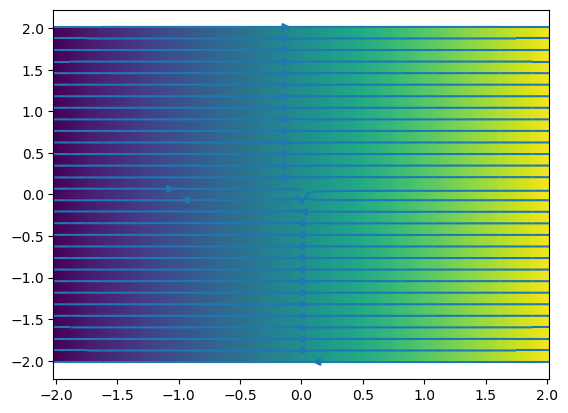

In [16]:
# Shear Initial Conditions
directory_name = "shear500/"
# Scalars relevant to specific simulation
parameters = {
    'Nx': 500, 
    'Ny': 500, 
    'NG': 2, 
    'rho': 1000, 
    'mu': 1.0e-6, 
    'xmin': -2.0, 
    'xmax': 2.0, 
    'ymin': -2.0, 
    'ymax': 2.0,
    'tmax': 1.0,
    'dt': 0.00001,
}

# Defining the x and y directions to populate the 5 fields
parameters['dx'] = (parameters['xmax'] - parameters['xmin']) / (parameters['Nx'] - 1)
parameters['dy'] = (parameters['ymax'] - parameters['ymin']) / (parameters['Ny'] - 1)

dx = parameters['dx']
dy = parameters['dy']

# Need to go extra distance to grab the ghost zones on the end
x = np.linspace(parameters['xmin'] - parameters['NG']*dx, parameters['xmax'] + parameters['NG']*dx, parameters['Nx'] + 2*parameters['NG'])
y = np.linspace(parameters['ymin'] - parameters['NG']*dy, parameters['ymax'] + parameters['NG']*dy, parameters['Ny'] + 2*parameters['NG'])

# Allocating u, v, gx, gy, p
u = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
v = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gx= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gy= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
p = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))

for (i, xi) in enumerate(x):
    for (j, yj) in enumerate(y):
        # Geometric coefficients useful for calculating the vortex
        theta = np.arctan2(xi, yj)
        r = np.sqrt(xi**2 + yj**2)
        
        gy[i,j] = -0.8     # Gravity always points down
        gx[i,j] = 0     
        
        u[i,j] = xi/10
        v[i,j] = 0.000005*np.sign(yj) / (.001 + yj**2)
        
        if (np.abs(yj) < 5*dy):
            noise = np.random.uniform()
            u[i,j] = u[i,j] + 0.01*noise
        
        # Pressure increases as a function of depth - rho*g*h
        h = parameters['ymax'] + 2*dy - yj
        p[i,j] = 100000 + parameters['rho']*(-gy[i,j])*h 


# Creating parameter file scalars.dat
write_parameters_to_file(directory_name+"scalars.dat", parameters)
write_to_csv(directory_name+"u.csv", u)
write_to_csv(directory_name+"v.csv", v)
write_to_csv(directory_name+"gx.csv", gx)
write_to_csv(directory_name+"gy.csv", gy)
write_to_csv(directory_name+"p.csv", p)
write_to_csv(directory_name+"x.csv", x)
write_to_csv(directory_name+"y.csv", y)

# Plotting commands, uncomment to see pressure field and velocity streamlines
X, Y = np.meshgrid(x, y)
plt.pcolor(x, y, u.T, shading='auto')
plt.streamplot(X, Y, u, v)
plt.show()

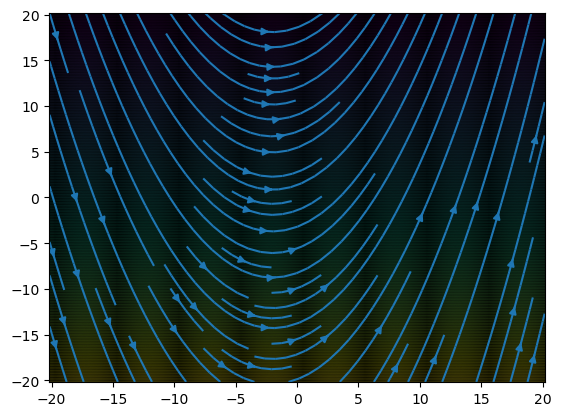

In [27]:
# laminar Initial Conditions
directory_name = "laminar500/"

# Scalars relevant to specific simulation
parameters = {
    'Nx': 500, 
    'Ny': 500, 
    'NG': 2, 
    'rho': 1000, 
    'mu': 1.0e-6, 
    'xmin': -20.0, 
    'xmax': 20.0, 
    'ymin': -20.0, 
    'ymax': 20.0,
    'tmax': 0.01,
    'dt':   0.00001,
}

# Defining the x and y directions to populate the 5 fields
parameters['dx'] = (parameters['xmax'] - parameters['xmin']) / (parameters['Nx'] - 1)
parameters['dy'] = (parameters['ymax'] - parameters['ymin']) / (parameters['Ny'] - 1)

dx = parameters['dx']
dy = parameters['dy']

# Need to go extra distance to grab the ghost zones on the end
x = np.linspace(parameters['xmin'] - parameters['NG']*dx, parameters['xmax'] + parameters['NG']*dx, parameters['Nx'] + 2*parameters['NG'])
y = np.linspace(parameters['ymin'] - parameters['NG']*dy, parameters['ymax'] + parameters['NG']*dy, parameters['Ny'] + 2*parameters['NG'])

# Allocating u, v, gx, gy, p
u = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
v = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gx= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
gy= np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))
p = np.zeros((parameters['Nx'] + 2*parameters["NG"], parameters['Ny'] + 2*parameters["NG"]))

for (i, xi) in enumerate(x):
    for (j, yj) in enumerate(y):
        # Geometric coefficients useful for calculating the vortex
        theta = np.arctan2(xi, yj)
        r = np.sqrt(xi**2 + yj**2)
        
        gy[i,j] = -0.5     # Gravity always points down
        gx[i,j] = 0     # Windy day?
        
        u[i,j] = 0.4 
        v[i,j] = 0.2 + 0.1*yj
        
        # Pressure increases as a function of depth - rho*g*h
        h = parameters['ymax'] + 2*dy - yj
        p[i,j] = 100000 + parameters['rho']*(-gy[i,j])*h 


# Creating parameter file scalars.dat
write_parameters_to_file(directory_name+"scalars.dat", parameters)
write_to_csv(directory_name+"u.csv", u)
write_to_csv(directory_name+"v.csv", v)
write_to_csv(directory_name+"gx.csv", gx)
write_to_csv(directory_name+"gy.csv", gy)
write_to_csv(directory_name+"p.csv", p)
write_to_csv(directory_name+"x.csv", x)
write_to_csv(directory_name+"y.csv", y)

# Plotting commands, uncomment to see pressure field and velocity streamlines
X, Y = np.meshgrid(x, y)
plt.pcolor(x, y, p.T, shading='auto')
plt.streamplot(X, Y, u, v)
# plt.quiver(X,Y, gx, gy)
plt.show()